### Run This Notebook in Google colab it takes too much time to execute BERT locally

# BERT

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip3 install ktrain flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 981 kB 48.4 MB/s 
     |████████████████████████████████| 265 kB 71.5 MB/s 
     |████████████████████████████████| 3.8 MB 70.5 MB/s 
     |████████████████████████████████| 1.3 MB 66.6 MB/s 
     |████████████████████████████████| 468 kB 71.0 MB/s 
     |████████████████████████████████| 880 kB 66.8 MB/s 
     |████████████████████████████████| 7.6 MB 67.8 MB/s 
     |████████████████████████████████| 182 kB 80.4 MB/s 
  Created wheel for ktrain: filename=ktrain-0.32.3-py3-none-any.whl size=25313585 sha256=56166204fbb5f96cad2386d02f5e22f9d5be28e073682cff4b5ad50c08393ca1
  Stored in directory: /root/.cache/pip/wheels/c4/a0/4b/38365824295b72c59f340fce7927cdb5438d2705f5dbbe47b7
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=55a9b567f3e9076c7f6a734d

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

In [7]:
df = pd.read_csv('/content/drive/MyDrive/NLP/NLP/SMSSpamCollection',sep = '\t', names = ['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.shape

(5572, 2)

### Train and Test splitting of the dataset

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data_train , data_test = train_test_split(df, test_size = 0.2 , random_state = 0)

In [11]:
data_train.shape

(4457, 2)

In [12]:
data_test.shape

(1115, 2)

In [13]:
1115 / 5572 * 100

20.010768126346015

In [14]:
(x_train , y_train) , (x_test , y_test) , preproc = text.texts_from_df(train_df = data_train,
                                                                      text_column = 'text',
                                                                      label_columns = 'label',
                                                                      val_df = data_test,
                                                                      preprocess_mode = 'bert') # or distilbert

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [15]:
# Use 'distilbert' if you want
model = text.text_classifier(name = 'bert',# or distilbert
                             train_data = (x_train , y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 400
done.


In [16]:
#here we have taken batch size of 6 as from the documentation it is recommended to use 
learner = ktrain.get_learner(model = model,
                             train_data = (x_train , y_train),
                             val_data = (x_test , y_test),
                             batch_size = 6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
743/743 [==============================] - 469s 603ms/step - loss: 0.3677 - accuracy: 0.8147
Epoch 2/2
743/743 [==============================] - 210s 282ms/step - loss: 1.8618 - accuracy: 0.8299


done.
Visually inspect loss plot and select learning rate associated with falling loss


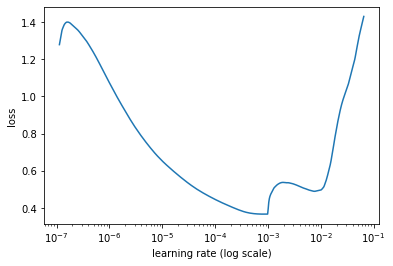

In [17]:
learner.lr_find(show_plot = True, max_epochs = 2)

In [18]:
# Essentially fit is a very basic training loop.
# whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('bert-spam-classifier')



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 519s 674ms/step - loss: 0.0973 - accuracy: 0.9607 - val_loss: 0.0248 - val_accuracy: 0.9946


In [19]:
# Essentially fit is a very basic training loop
# Whereas fit one cycle uses the on cyclic policy 
learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('best-spam-classifer')



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 498s 670ms/step - loss: 0.0229 - accuracy: 0.9951 - val_loss: 0.0177 - val_accuracy: 0.9937


In [20]:
msg1 = ["GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GAURANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm"]
msg2 = ["New Theory: Argument wins d SITUATION, but loses the PERSON. So dont argue with ur friends just.. . . . kick them &amp; say I'm always correct.!"]

In [21]:
predictor.predict(msg1)


1/1 [==============================] - 4s 4s/step


['spam']

In [22]:
predictor.predict(msg2)


1/1 [==============================] - 0s 71ms/step


['ham']